In [2]:
#def getStockFromQuandl(symbol, name, start, end):

import quandl
df =  quandl.get("LBMA/SILVER", trim_start = "01/01/2003", trim_end ="01/01/2017", authtoken="_N85bWLCNCWz14smKHSi")
name="SILVER"
df.columns.values[-1] = 'AdjClose'
df.columns = df.columns + '_' + name
df['Return_%s' %name] = df['AdjClose_%s' %name].pct_change()
df.head()   
#return df

,USD_SILVER,GBP_SILVER,AdjClose_SILVER,Return_SILVER
Date,,,,
2003-01-02,4.740,2.94776,4.52722,NaN
2003-01-03,4.785,3.00094,4.61205,0.018738
2003-01-06,4.910,3.04307,4.68288,0.015358
2003-01-07,4.840,3.01840,4.65161,-0.006678
2003-01-08,4.775,2.98065,4.58694,-0.013903


In [8]:
df =  quandl.get("OPEC/ORB", trim_start = "01/01/2003", trim_end ="01/01/2017", authtoken="_N85bWLCNCWz14smKHSi")
name="Crude OIL"
df.columns.values[-1] = 'AdjClose'
df.columns = df.columns + '_' + name
df['Return_%s' %name] = df['AdjClose_%s' %name].pct_change()
df.head()   

,AdjClose_Crude OIL,Return_Crude OIL
Date,,
2003-01-02,30.05,NaN
2003-01-03,30.83,0.025957
2003-01-06,30.71,-0.003892
2003-01-07,29.72,-0.032237
2003-01-08,28.86,-0.028937


In [9]:
df =  quandl.get("CUR/EUR", trim_start = "01/01/2003", trim_end ="01/01/2017", authtoken="_N85bWLCNCWz14smKHSi")
name="EURO"
df.columns.values[-1] = 'AdjClose'
df.columns = df.columns + '_' + name
df['Return_%s' %name] = df['AdjClose_%s' %name].pct_change()
df.head()   

,AdjClose_EURO,Return_EURO
DATE,,
2003-01-01,0.952560,NaN
2003-01-02,0.963904,0.011909
2003-01-03,0.960407,-0.003628
2003-01-04,0.961190,0.000815
2003-01-05,0.961190,0.000000


In [3]:
#
# Monte Carlo valuation of European call option
# in Black-Scholes-Merton model
# bsm_mcs_euro.py
#
import numpy as np
# Parameter Values
S0 = 100. # initial index level
K = 105. # strike price
T = 1.0 # time-to-maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility
I = 100000 # number of simulations
# Valuation Algorithm
z = np.random.standard_normal(I) # pseudorandom numbers
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
# index values at maturity
hT = np.maximum(ST - K, 0) # inner values at maturity
C0 = np.exp(-r * T) * np.sum(hT) / I # Monte Carlo estimator
# Result Output
print(C0)


8.10260319992


In [10]:
import numpy as np
import pandas as pd
#import pandas.io.data as web
import pandas_datareader.data as web
#from pandas_datareader import data, wb
goog = web.DataReader("GOOG", data_source="google",start="3/14/2009", end="4/14/2014")
goog.tail()


,Open,High,Low,Close,Volume
Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406.0
2014-04-09,559.62,565.37,552.95,564.14,3324742.0
2014-04-10,565.00,565.00,539.90,540.95,4027743.0
2014-04-11,532.55,540.00,526.53,530.60,3916171.0
2014-04-14,538.25,544.10,529.56,532.52,2568020.0


In [11]:
goog["Log_Ret"] = np.log(goog["Close"] / goog["Close"].shift(1))
#goog["Volatility"] = pd.rolling_std(goog["Log_Ret"],window=252) * np.sqrt(252)

goog["Volatility"] = goog["Log_Ret"].rolling(window=252,center=False).std() * np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A86C1D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B1F0F98>], dtype=object)

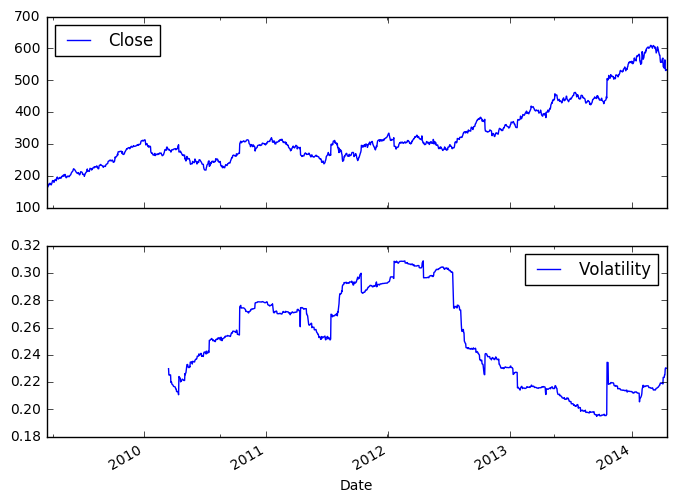

In [12]:
 %matplotlib inline
goog[["Close", "Volatility"]].plot(subplots=True, color="blue",figsize=(8, 6))

In [1]:
import numpy as np
import pandas as pd
#import pandas.io.data as web
import pandas_datareader.data as web
import matplotlib as plt
import matplotlib.pylab as py


DPI: 72.0
Default size in Inches [ 6.  4.]
Which should result in a 432 x 288 Image


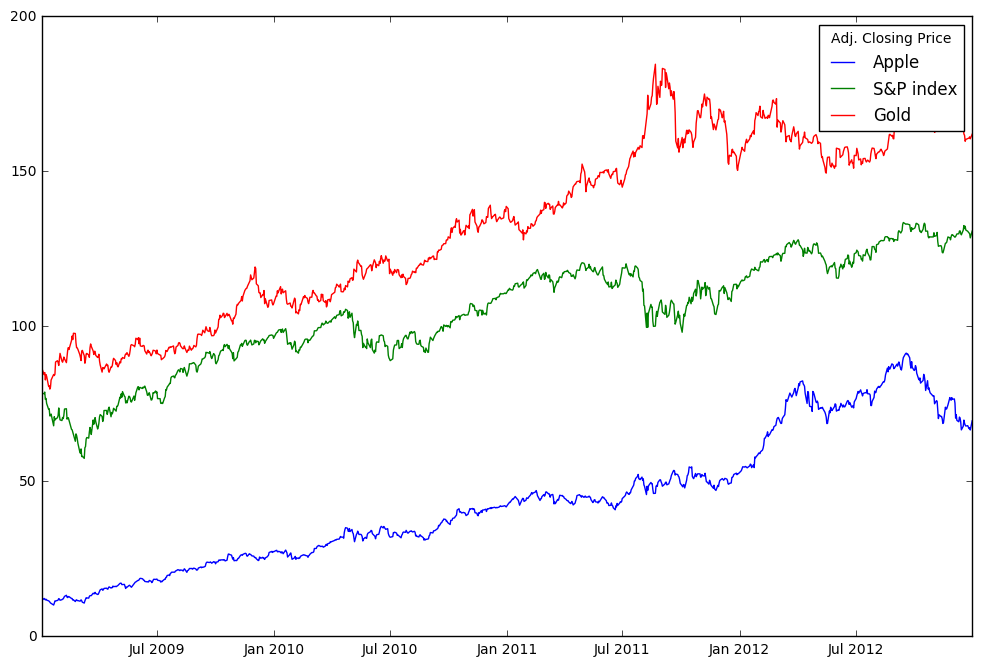

In [5]:
 %matplotlib inline
aapl = web.DataReader("AAPL", start='2009-1-1', end='2012-12-31',data_source='yahoo')['Adj Close']
spy =  web.DataReader("SPY", start='2009-1-1', end='2012-12-31',data_source='yahoo')['Adj Close']
gold =  web.DataReader("GLD", start='2009-1-1', end='2012-12-31',data_source='yahoo')['Adj Close']

#aapl.plot(title='AAPL Adj. Closing Price', label='Apple')
#spy.plot(label='S&P Index')
plt.pyplot.plot(aapl,label='Apple' )
plt.pyplot.plot(spy, label="S&P index")
plt.pyplot.plot(gold, label="Gold")
plt.pyplot.legend( loc='upper left', numpoints = 1 )
plt.pyplot.legend( title='Adj. Closing Price' )
F = py.gcf()
DPI = F.get_dpi()
print "DPI:", DPI
DefaultSize = F.get_size_inches()
print "Default size in Inches", DefaultSize
print "Which should result in a %i x %i Image"%(DPI*DefaultSize[0], DPI*DefaultSize[1])
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*2) )

0.042203935878
0.0


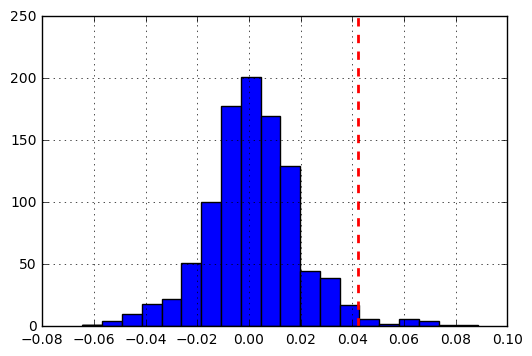

In [11]:

daily_appl=aapl.pct_change(1)

P=daily_appl.hist(bins=20)
mean_appl=daily_appl[1].mean()
std_appl=daily_appl[1].std()
print(mean_appl)
print(std_appl)
P.axvline(mean_appl, color="r",linestyle="dashed",linewidth=2)
#P.axvline(std_appl, color="w",linestyle="dashed",linewidth=2)
#P.axvline((-std_appl)*2, color="w",linestyle="dashed",linewidth=2)

In [4]:
#daily_spy=spy.pct_change(1) 
#daily_spy.hist()
daily_return = spy.pct_change(1) # 1 for ONE DAY lookback
monthly_return = spy.pct_change(21) # 21 for ONE MONTH lookback
annual_return = spy.pct_change(252) # 252 for ONE YEAR lookback

P2=daily_return.hist()
mean_spy=daily_return[1].mean()
std_spy=daily_return[1].std()
P2.axvline(mean_spy, color="r",linestyle="dashed",linewidth=2)
P2.axvline(std_spy, color="w",linestyle="dashed",linewidth=2)
P2.axvline(-std_spy*2, color="w",linestyle="dashed",linewidth=2)

NameError: name 'spy' is not defined

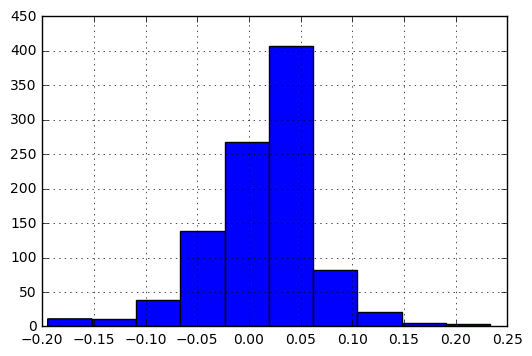

In [86]:
monthly_return.hist()


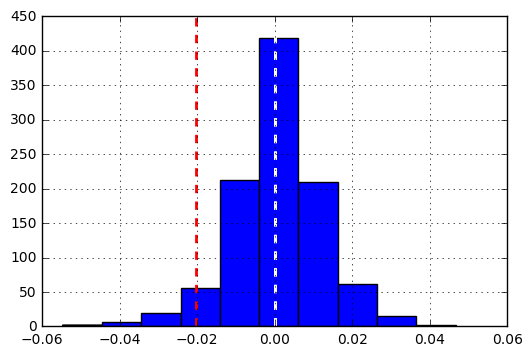

In [98]:
daily_return_g = gold.pct_change(1) # 1 for ONE DAY lookback


P3=daily_return_g.hist()
mean_gold=daily_return_g[1].mean()
std_gold=daily_return_g[1].std()
P3.axvline(mean_gold, color="r",linestyle="dashed",linewidth=2)
P3.axvline(std_gold, color="w",linestyle="dashed",linewidth=2)
P3.axvline(0-std_gold, color="w",linestyle="dashed",linewidth=2)

ValueError: On entry to DGELSD parameter number 4 had an illegal value

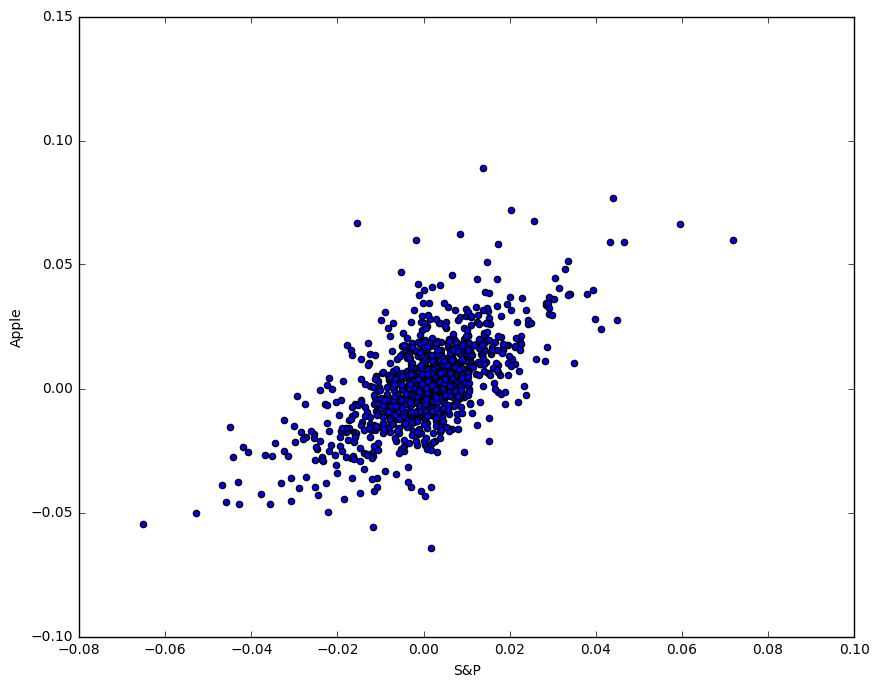

In [13]:
import matplotlib.pyplot as plt2
import numpy as np
daily_returns = spy.pct_change(1)
daily_returns.fillna(0)
daily_returna = aapl.pct_change(1)
daily_returna.fillna(0)
daily_returng = gold.pct_change(1)
plt2.figure(figsize=(10,8))
plt2.scatter(x=daily_returns,y=daily_returna)
plt2.xlabel("S&P")
plt2.ylabel("Apple")
beta_apple,alpha_apple=np.polyfit(daily_returns, daily_returna,1)

#plt2.scatter(y=daily_returna, label="Apple")
# Chart title
#plt.title('Battles Of The War Of The Five Kings')

# and a legend
#plt2.legend(loc='upper right')

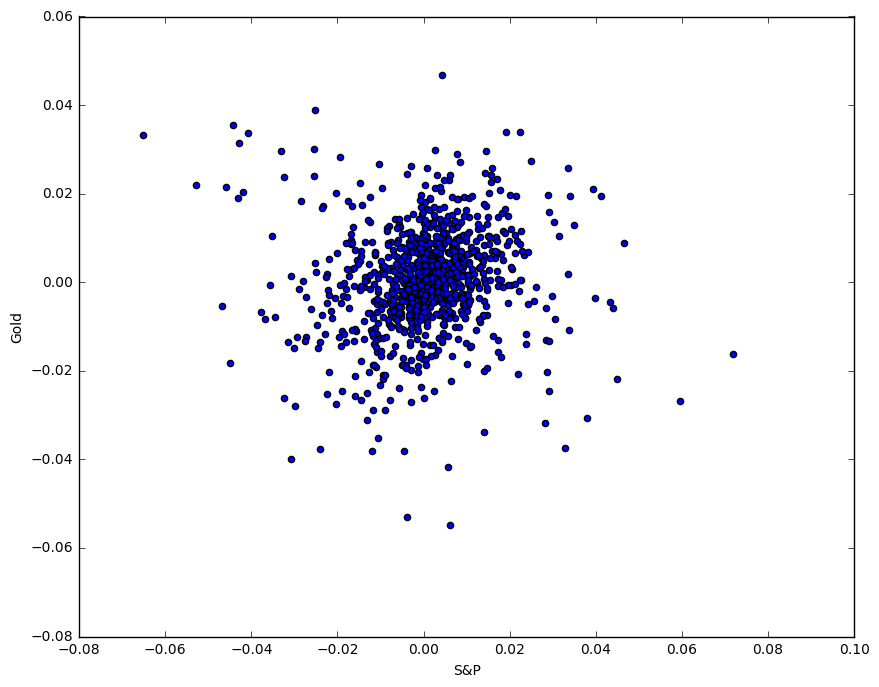

In [115]:
plt2.figure(figsize=(10,8))
plt2.scatter(x=daily_returns,y=daily_returng)
plt2.xlabel("S&P")
plt2.ylabel("Gold")

DPI: 72.0
Default size in Inches [ 6.  4.]
Which should result in a 432 x 288 Image


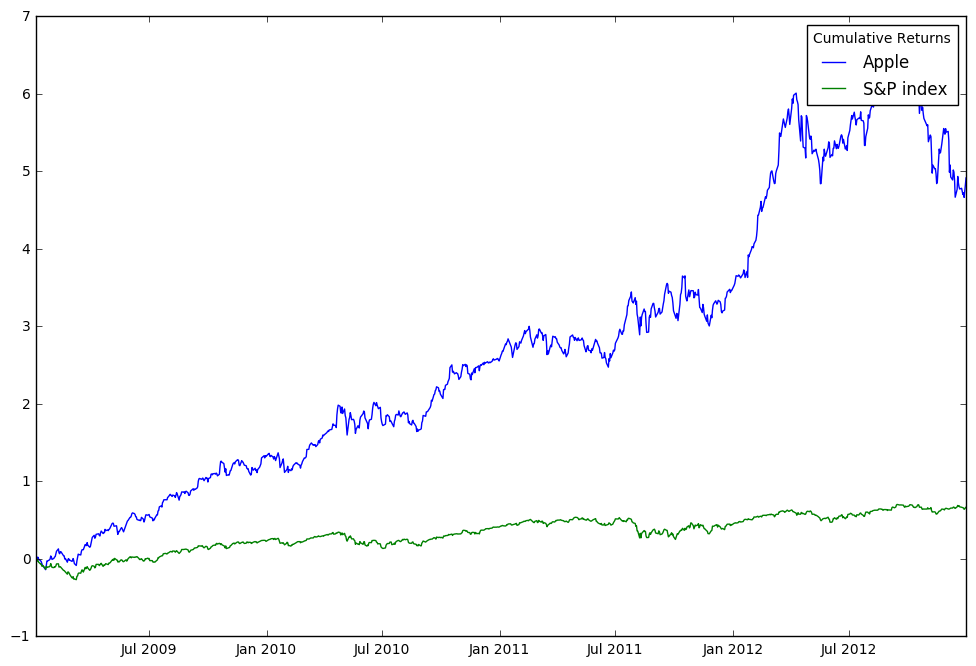

In [87]:

returns = aapl.pct_change()
rerturs_aapl=((1 + returns).cumprod() - 1)
plt.pyplot.plot(rerturs_aapl,label='Apple' )
#((1 + returns).cumprod() - 1).plot(title='AAPL Cumulative Returns')
returns2 = spy.pct_change()
rerturs_spy=((1 + returns2).cumprod() - 1)
plt.pyplot.plot(rerturs_spy, label="S&P index")
plt.pyplot.legend( loc='upper left', numpoints = 1 )
plt.pyplot.legend( title='Cumulative Returns' )
F = plt.pylab.gcf()
DPI = F.get_dpi()
print "DPI:", DPI
DefaultSize = F.get_size_inches()
print "Default size in Inches", DefaultSize
print "Which should result in a %i x %i Image"%(DPI*DefaultSize[0], DPI*DefaultSize[1])
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*2) )